Linear Regression with AutoMobile Dataset from the UCI repository

In this section I will import the AutoMobile dataset from the UCI repository in order to predict car prices.  I will do some preprocessing or cleaning of the data, scale the data to bring the range of data across all columns into a more appropriate range then run Linear Regression as well as Ridge and Lasso Regression models.  I will then compare the Training and Test set scores of each to determine whether or not there is overfitting, underfitting or if the scores for a particular model are ideal.

Lets import the Automobile Dataset from the UCI repositotry.  For the read_csv function I will set na_values parameter to ?, 0 and '' which indicates that for any columns whose values contain a question mark, zero or empty values within the specific column, those values will be replaced with a NAN as part of preprocessing the dataset. This will allow me to replace NAN with the mean value of each respective column.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
path="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
columns=['symboling','normalized-losses','make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length:', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
df = pd.read_csv(path, index_col = None, names=columns, na_values=['?', 0, ''])
df


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length:,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1.0,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2.0,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2.0,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1.0,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1.0,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1.0,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


Lets run the info method on the dataframe to see the datatype of each column in the dataframe as well as the number of non-null values in each column.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          138 non-null    float64
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length:            205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Now I am going to use the describe method on the dataframe to get some statistical information from data such as the mean, standard deviation, min and max values within each column.  

In [3]:
df.describe()

,symboling,normalized-losses,wheel-base,length:,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,138.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,1.239130,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.343024,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,1.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Now that we have some statiscal information, lets check how each column correlates with the target variable price. I will sort the order of the values in decending order.  I am also going to set the decimal format to allow only 2 values to allow for clearer evaluation of the data.

In [4]:
pd.options.display.float_format = '{:,.2f}'.format
corr = df.corr()
corr['price'].sort_values(ascending=False)

price                1.00
engine-size          0.87
curb-weight          0.83
horsepower           0.81
width                0.75
length:              0.69
wheel-base           0.58
bore                 0.54
normalized-losses    0.20
height               0.14
stroke               0.08
compression-ratio    0.07
symboling           -0.05
peak-rpm            -0.10
city-mpg            -0.69
highway-mpg         -0.70
Name: price, dtype: float64

Now lets check for all column attributes which are less than -0.6 as well as all those which are greater than 0.6 but less than 1.  These are the features which at the end of our data analysis and preprocessing step will be run through the Linear Regression algorithm.

In [5]:
extracted_features = corr['price'][(corr['price'] < -0.6) | ((corr['price'] > 0.6) & (corr['price'] <1))]   
extracted_features     

length:        0.69
width          0.75
curb-weight    0.83
engine-size    0.87
horsepower     0.81
city-mpg      -0.69
highway-mpg   -0.70
Name: price, dtype: float64

Now with the understanding of the features above that we will keep let find the features that we want to drop from the dataframe.  Lets start by finding the features that do not correlate with the price well by taking those less then 0 but greater that -0.6 as well as those greater than zero and less than 0.6.  This will be the group of features we drop from the dataframe.

In [6]:
throwaway_features = corr['price'][((corr['price'] > -0.6) & (corr['price'] <0)) | ((corr['price'] > 0) & (corr['price'] <0.6))]   
throwaway_features

symboling           -0.05
normalized-losses    0.20
wheel-base           0.58
height               0.14
bore                 0.54
stroke               0.08
compression-ratio    0.07
peak-rpm            -0.10
Name: price, dtype: float64

Here i will take the throw away features and turn them into a list to be dropped from the dataframe.

In [7]:
thf = throwaway_features.keys()
throw_list = thf.to_list()
throw_list

['symboling',
 'normalized-losses',
 'wheel-base',
 'height',
 'bore',
 'stroke',
 'compression-ratio',
 'peak-rpm']

Also before going any further, lets see how many null values exist within each column of the dataset.

In [8]:
df.isnull().sum()

symboling            67
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length:               0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Since the price column has 4 null values lets go ahead and remove each row in the dataset corresponding to each of the null values.

In [9]:
df = df.dropna(axis=0, subset=['price'])

Lets now recheck to verify the null values have been removed.

In [10]:
df.isnull().sum()

symboling            65
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length:               0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

We can see from above that all null values from the price column have been removed.



Now below I am going to take the list of throw away features from the previous step and drop them from the dataframe.  I will set axis to 1 for the columns and set inplace equal to True in order to save the new dataframe.

In [11]:
df.drop(throw_list, axis = 1,inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Now we will assign the contents of the price column which is the target or output value we are looking to predict to the y variable.  The y variable will be used to train the Regression models later on.

In [12]:
y = df['price']
y

0     13,495.00
1     16,500.00
2     16,500.00
3     13,950.00
4     17,450.00
         ...   
200   16,845.00
201   19,045.00
202   21,485.00
203   22,470.00
204   22,625.00
Name: price, Length: 201, dtype: float64

With the price column assinged to the y variable we can now drop the price column from the dataset to allow for further preprocessing of the dataset.

In [13]:

df.drop(['price'], axis = 1,inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
df

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,length:,width,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,city-mpg,highway-mpg
0,alfa-romero,gas,std,two,convertible,rwd,front,168.80,64.10,2548,dohc,four,130,mpfi,111.00,21,27
1,alfa-romero,gas,std,two,convertible,rwd,front,168.80,64.10,2548,dohc,four,130,mpfi,111.00,21,27
2,alfa-romero,gas,std,two,hatchback,rwd,front,171.20,65.50,2823,ohcv,six,152,mpfi,154.00,19,26
3,audi,gas,std,four,sedan,fwd,front,176.60,66.20,2337,ohc,four,109,mpfi,102.00,24,30
4,audi,gas,std,four,sedan,4wd,front,176.60,66.40,2824,ohc,five,136,mpfi,115.00,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,188.80,68.90,2952,ohc,four,141,mpfi,114.00,23,28
201,volvo,gas,turbo,four,sedan,rwd,front,188.80,68.80,3049,ohc,four,141,mpfi,160.00,19,25
202,volvo,gas,std,four,sedan,rwd,front,188.80,68.90,3012,ohcv,six,173,mpfi,134.00,18,23
203,volvo,diesel,turbo,four,sedan,rwd,front,188.80,68.90,3217,ohc,six,145,idi,106.00,26,27


Now in preparation to further preprocess and clean the dataset lets separate the categorical from the numerical columns. I will extract the names of the numerical and categorical columns and save each to a list.

In [15]:
categorical = []
cat_only =[]
for col in df:
  if df[col].dtypes == object:
    categorical.append(col)
for name in categorical:
  cat_only.append(name.strip())
cat_only



['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

In [16]:
num_only = []
numerical = [col for col in df.columns
             if col not in categorical]
for num in numerical:
  num_only.append(num.strip())

num_only


['length:',
 'width',
 'curb-weight',
 'engine-size',
 'horsepower',
 'city-mpg',
 'highway-mpg']

Now that we have the categorical and numerical data separated lets use the seaborn countplot to see a bar chart of each of the categorical columns.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

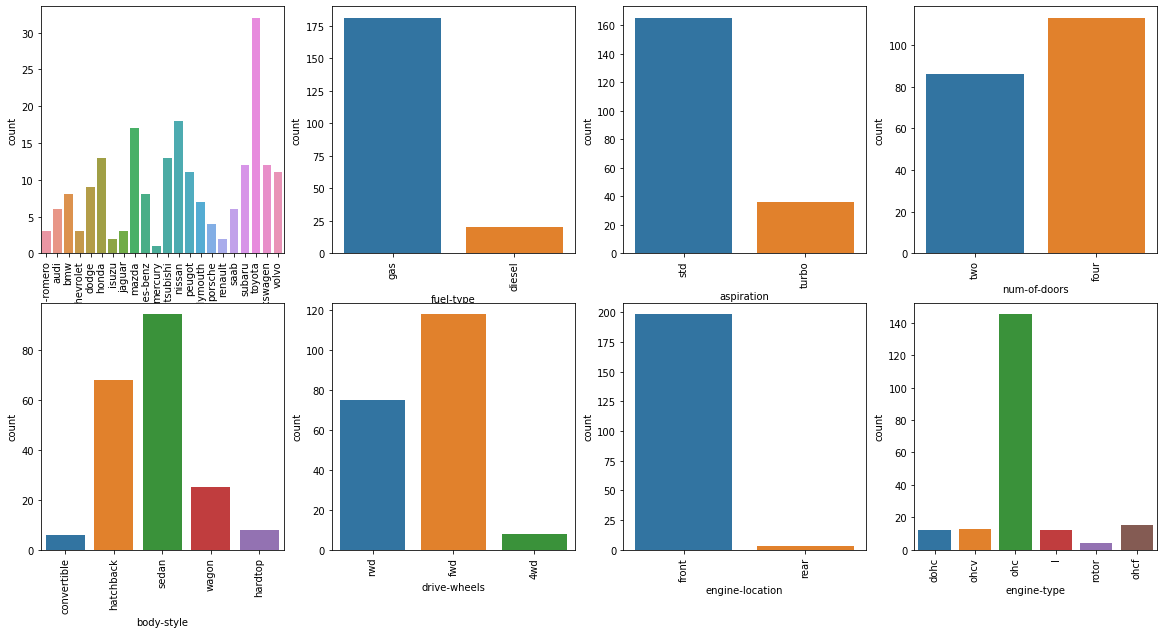

In [17]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(cat_only, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

Next I want to use the seaborn boxplot to check for outliers within each of the categorical columns.

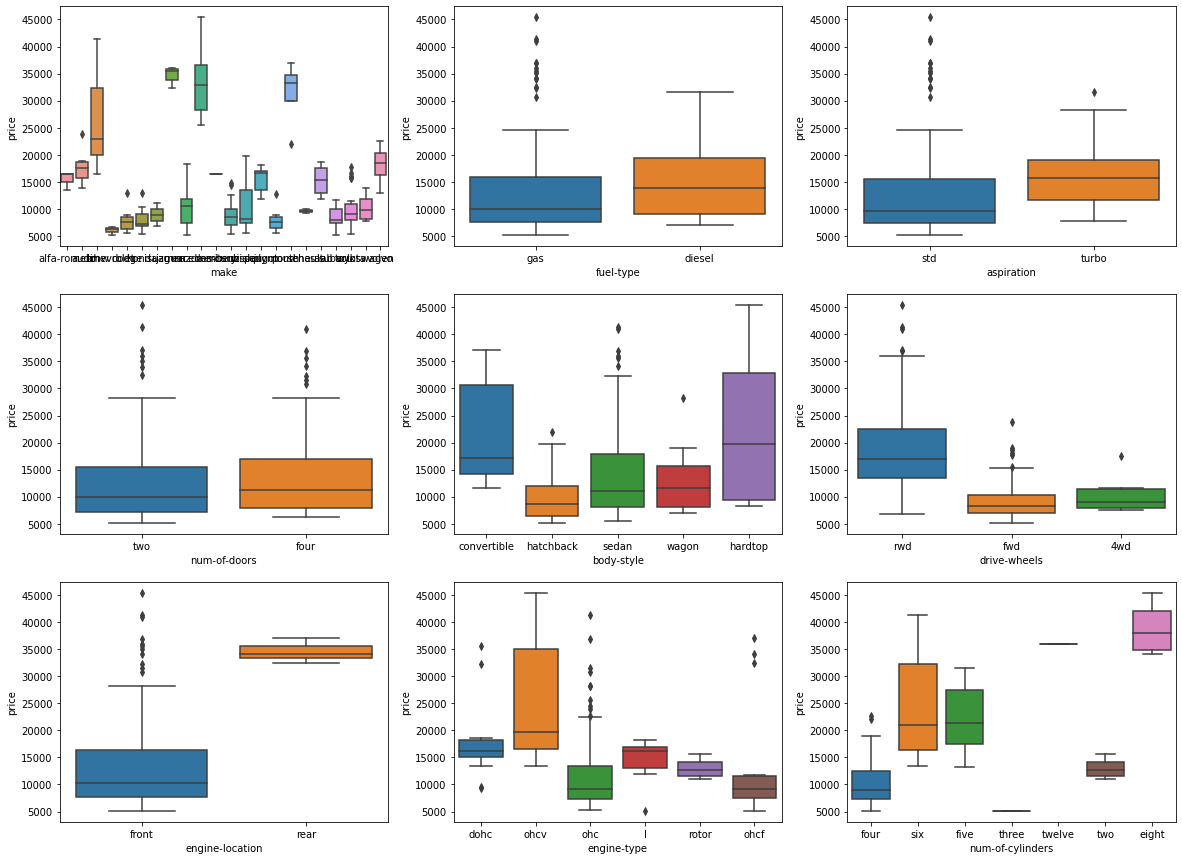

In [18]:
fig, ax = plt.subplots(3, 3, figsize=(20, 15))
for var, subplot in zip(cat_only, ax.flatten()):
    sns.boxplot(x=var, y=y, data=df, ax=subplot)

Now I am going to check the distribution of each of the numerical columns using the num_only list created previously when we separated the categorical and numerical columns.  I am doing so just to get an initial view of the distribution of the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a04fb8950>,
      dtype=object)

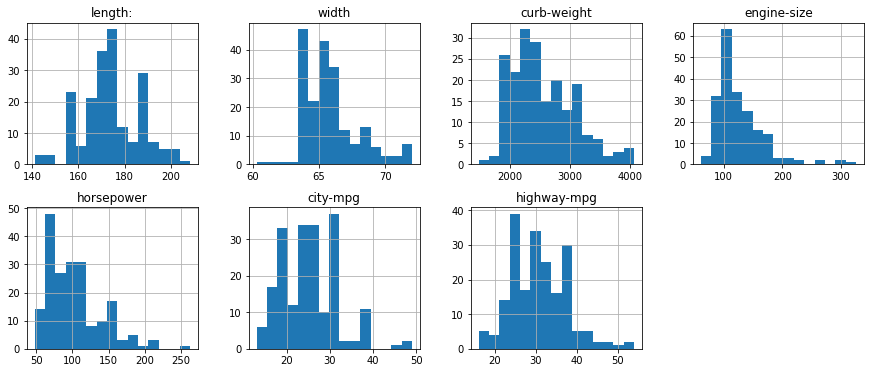

In [19]:
df[num_only].hist(bins=15, figsize=(15,6), layout=(2,4))

Now i am going to make a copy of the dataframe df and assign it to the new dataframe dfn.  In doing so, I can drop the categorical columns for the new dataframe and maintain the original dataframe.  In the process the numerical columns are isolated to their own datafrme for data cleaning.

In [20]:
dfn = df.copy()
dfn.drop(cat_only, axis=1, inplace=True)
dfn


,length:,width,curb-weight,engine-size,horsepower,city-mpg,highway-mpg
0,168.80,64.10,2548,130,111.00,21,27
1,168.80,64.10,2548,130,111.00,21,27
2,171.20,65.50,2823,152,154.00,19,26
3,176.60,66.20,2337,109,102.00,24,30
4,176.60,66.40,2824,136,115.00,18,22
...,...,...,...,...,...,...,...
200,188.80,68.90,2952,141,114.00,23,28
201,188.80,68.80,3049,141,160.00,19,25
202,188.80,68.90,3012,173,134.00,18,23
203,188.80,68.90,3217,145,106.00,26,27


Now I am going to impute null values of the columns of the numerical dataframe with the mean of each respective column.

In [21]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
dfn_imputed = imputer.fit_transform(dfn)
dfn_imputed


array([[ 168.8,   64.1, 2548. , ...,  111. ,   21. ,   27. ],
       [ 168.8,   64.1, 2548. , ...,  111. ,   21. ,   27. ],
       [ 171.2,   65.5, 2823. , ...,  154. ,   19. ,   26. ],
       ...,
       [ 188.8,   68.9, 3012. , ...,  134. ,   18. ,   23. ],
       [ 188.8,   68.9, 3217. , ...,  106. ,   26. ,   27. ],
       [ 188.8,   68.9, 3062. , ...,  114. ,   19. ,   25. ]])

Now I am going to scale the data of the numerical dataframe using the StandardScaler class so that the data ranges are not as varied.

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfn_scaled = scaler.fit_transform(dfn_imputed)
dfn_scaled

array([[-0.43940949, -0.85346024, -0.01485764, ...,  0.20398438,
        -0.65224901, -0.54228772],
       [-0.43940949, -0.85346024, -0.01485764, ...,  0.20398438,
        -0.65224901, -0.54228772],
       [-0.24415236, -0.18559675,  0.51807951, ...,  1.35764881,
        -0.96439676, -0.689386  ],
       ...,
       [ 1.18773324,  1.43635744,  0.88435268, ...,  0.8210607 ,
        -1.12047063, -1.13068086],
       [ 1.18773324,  1.43635744,  1.2816331 , ...,  0.06983735,
         0.12812034, -0.54228772],
       [ 1.18773324,  1.43635744,  0.98125034, ...,  0.28447259,
        -0.96439676, -0.83648429]])

Lets now rebuild this scaled data and its column names bsck into a dataframe.

In [23]:
import pandas as pd
dfn = pd.DataFrame(data=dfn_scaled, columns=num_only)
dfn

,length:,width,curb-weight,engine-size,horsepower,city-mpg,highway-mpg
0,-0.44,-0.85,-0.01,0.08,0.20,-0.65,-0.54
1,-0.44,-0.85,-0.01,0.08,0.20,-0.65,-0.54
2,-0.24,-0.19,0.52,0.61,1.36,-0.96,-0.69
3,0.20,0.15,-0.42,-0.43,-0.04,-0.18,-0.10
4,0.20,0.24,0.52,0.22,0.31,-1.12,-1.28
...,...,...,...,...,...,...,...
196,1.19,1.44,0.77,0.34,0.28,-0.34,-0.40
197,1.19,1.39,0.96,0.34,1.52,-0.96,-0.84
198,1.19,1.44,0.88,1.11,0.82,-1.12,-1.13
199,1.19,1.44,1.28,0.44,0.07,0.13,-0.54


Lets verify that null values no longer exist for any of the attributes in the dataframe.

In [24]:
dfn.isnull().sum()

length:        0
width          0
curb-weight    0
engine-size    0
horsepower     0
city-mpg       0
highway-mpg    0
dtype: int64

Now I am going to perform one hot encoding on the categorical dataframe using the pandas get_dummies function in order to change the categorical values of each column into numerical values so that the data can be used to train the regression algorithm later on.

In [ ]:
df_cat = df.copy()
df_cat = df_cat.drop(num_only, axis=1)
cat = pd.get_dummies(df_cat)
cat

,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


Now I am going to join both the categorical and numerical dataframes together to form a new dataframe.

In [ ]:
dfn.reset_index(drop=True, inplace=True)
cat.reset_index(drop=True, inplace=True)
new_df = pd.concat([dfn,cat], axis=1)


Now we take X and y and split the data into training and test sets using sklearns train_test_split.  Then we can create an instance of he Linear Regression class lr and fit the instance object with the variables X_train, y_train.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df, y, random_state=0)#use random state so it is reproducible

lr = LinearRegression()
lr.fit(X_train, y_train)
print("Training score is: {:.2f}".format(lr.score(X_train, y_train)))
print('Test score is:{:.2f}'.format(lr.score(X_test, y_test)))
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
#print("R2 score for train is: {:.3f}".format(y_train, y_train_pred))
#print("R2 score for test is: {:.3f}".format(y_test, y_test_pred))

Training score is: 0.95
Test score is:0.94


With the training score and test scores of 95% and 94% respectively we can see this is a case of underfitting.  Now lets use Ridge Regression with a default alpha parameter equal to one.  The alpha parameter is set when creating a Ridge instance variable such as rigde = Ridge(alpha = 1) but can be left as ridge = Ridge() since it is the default.  Now lets see what R2 score can be obtained for the training and test sets as well as how many variables the Ridge model picks and removes.

In [ ]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df, y, random_state=0)#use random state so it is reproducible
ridge = Ridge()
ridge.fit(X_train, y_train)
print("R2 Training score is: {:.2f}".format(ridge.score(X_train, y_train)))
print('R2Test score is: {:.2f}'.format(ridge.score(X_test, y_test)))
print("Ridge picked " + str(sum(ridge.coef_ != 0)) + " variables")
print("Ridge removed " + str(sum(ridge.coef_ == 0)) + " variables")

R2 Training score is: 0.95
R2Test score is: 0.94
Ridge picked 66 variables
Ridge removed 0 variables


We can see that with a Training and Test score of 95% to 94% we have a case of definite underfitting.  Now lets try fitting a Lasso Regression model to see what the R2 score is in comparisson to that which was obtained above with Ridge. Here again we will leave the alpha parameter equal to one just as was done for Ridge in the code above.

In [ ]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(new_df, y, random_state=0)#use random state so it is reproducible
lasso = Lasso()
lasso.fit(X_train, y_train)
print("R2 Training score is: {:.3f}".format(lasso.score(X_train, y_train)))
print('R2 Test score is:{:.3f}'.format(lasso.score(X_test, y_test)))
print("Lasso picked " + str(sum(lasso.coef_ != 0)) + " variables")
print("Lasso removed " + str(sum(lasso.coef_ == 0)) + " variables")

R2 Training score is: 0.954
R2 Test score is:0.932
Lasso picked 53 variables
Lasso removed 13 variables


We can see the results are somewhat improved, with Lasso removing some of the features.  Lets train a Ridge Regression model with the range of alpha values [.001, .01, .1, 1, 10, 100] as well as using GridSearch and using a pipeline through the use of make_pipeline to see if the scores would improve.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(new_df,y, random_state = 0)
pipe = make_pipeline(Ridge())
param={'ridge__alpha':[.001, .01, .1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param, cv=5)
grid.fit(X_train, y_train)

print("Best grid params are: {}".format(grid.best_params_))#
print("Training Score: {:.2f}".format(grid.score(X_train, y_train)))
print("Test Score: {:.2f}".format(grid.score(X_test, y_test)))
#print("Selected Features: ", grid.get_params)

Best grid params are: {'ridge__alpha': 0.1}
Training Score: 0.95
Test Score: 0.94


The result we get is similar to original Linear and Ridge regression model that we training.  Lets try training a Lasso Regression model with similar values of the previous step to see what the results are.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(new_df,y, random_state = 0)
pipe = make_pipeline(Lasso())
param = {'lasso__alpha':[.001, .01, .1, 10, 100]}
grid = GridSearchCV(pipe,param_grid=param, cv=5)
grid.fit(X_train, y_train)

print("Best grid params are: {}".format(grid.best_params_))#
print("Training Score: {:.2f}".format(grid.score(X_train, y_train)))
print("Test Score: {:.2f}".format(grid.score(X_test, y_test)))
#print("Selected Features: ", grid.get_params)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76634927.75614803, tolerance: 649846.59692
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39266871.933975965, tolerance: 604096.5297325
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17054120.181875408, tolerance: 569911.3596591667
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74217648.00904854,

Best grid params are: {'lasso__alpha': 10}
Training Score: 0.95
Test Score: 0.93


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1931016.146159172, tolerance: 604096.5297325
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2267061.647496909, tolerance: 569911.3596591667
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7235200.691502601, tolerance: 697313.1602991668
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6085993.8698025

Lastly lets see how the data does with the XGBRegressor.

In [ ]:
from xgboost import XGBRegressor
X_train, X_test, y_train, y_test = train_test_split(new_df,y, random_state = 0)
xgb = XGBRegressor(verbosity=0)
xgb.fit(X_train, y_train)
print("Training Score: {:.2f}".format(xgb.score(X_train, y_train)))
print("Test Score: {:.2f}".format(xgb.score(X_test, y_test)))

Training Score: 0.99
Test Score: 0.93


The scores above using the XBGRegressor shows and marked improvement generalization of the test set with the test score of 93%